### This notebook will parse the data structure function time data and plot a graph of the execution times of insert, search and delete functions for Queue array,Queue list, Sorted list and BST

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# read the function data
df = pd.read_csv("function_time_data.csv")
df.head(12)

,data_structure,operation,input_size,data_size,time_nano
0,q_array,insert,10,10,343
1,q_array,search,10,10,179
2,q_array,delete,10,9,101
3,q_list,insert,10,10,201
4,q_list,search,10,10,102
5,q_list,delete,10,9,274
6,sorted_list,insert,10,10,275
7,sorted_list,search,10,10,181
8,sorted_list,delete,10,9,236
9,binary_search_tree,insert,10,10,371


In [120]:
df.tail(12)

,data_structure,operation,input_size,data_size,time_nano
648,q_array,insert,10240,10240,98267
649,q_array,search,10240,10240,86079
650,q_array,delete,10240,10239,88
651,q_list,insert,10240,10240,164
652,q_list,search,10240,10240,36960
653,q_list,delete,10240,10239,269
654,sorted_list,insert,10240,10240,40295
655,sorted_list,search,10240,10240,43443
656,sorted_list,delete,10240,10239,45282
657,binary_search_tree,insert,10240,10240,605


In [121]:
# create dataframes for each operation
insert_df = df[df['operation']=='insert']
delete_df = df[df['operation']=='delete']
search_df = df[df['operation']=='search']

In [122]:
insert_df.head(12)

,data_structure,operation,input_size,data_size,time_nano
0,q_array,insert,10,10,343
3,q_list,insert,10,10,201
6,sorted_list,insert,10,10,275
9,binary_search_tree,insert,10,10,371
12,q_array,insert,20,20,361
15,q_list,insert,20,20,121
18,sorted_list,insert,20,20,240
21,binary_search_tree,insert,20,20,318
24,q_array,insert,40,40,533
27,q_list,insert,40,40,124


In [123]:
delete_df.head(12)

,data_structure,operation,input_size,data_size,time_nano
2,q_array,delete,10,9,101
5,q_list,delete,10,9,274
8,sorted_list,delete,10,9,236
11,binary_search_tree,delete,10,9,419
14,q_array,delete,20,19,77
17,q_list,delete,20,19,87
20,sorted_list,delete,20,19,188
23,binary_search_tree,delete,20,19,445
26,q_array,delete,40,39,76
29,q_list,delete,40,39,82


In [124]:
search_df.head(12)

,data_structure,operation,input_size,data_size,time_nano
1,q_array,search,10,10,179
4,q_list,search,10,10,102
7,sorted_list,search,10,10,181
10,binary_search_tree,search,10,10,197
13,q_array,search,20,20,278
16,q_list,search,20,20,123
19,sorted_list,search,20,20,141
22,binary_search_tree,search,20,20,120
25,q_array,search,40,40,485
28,q_list,search,40,40,179


In [125]:
# plot graph for insert operation

# reshape the data
insert_df = insert_df.pivot_table(
    index='input_size',
    columns='data_structure',
    values='time_nano',
    aggfunc='mean')
insert_df

data_structure,binary_search_tree,q_array,q_list,sorted_list
input_size,,,,
10,410.4,364.0,200.2,279.0
20,414.4,417.0,137.8,269.0
40,365.2,601.2,125.4,308.6
80,352.2,1052.8,130.2,478.2
160,374.8,1991.0,132.6,807.6
320,426.2,3745.0,131.0,1671.0
640,438.6,7475.2,143.8,2818.6
1280,531.2,21362.8,199.4,7000.8
2560,446.6,29799.2,160.6,10202.4


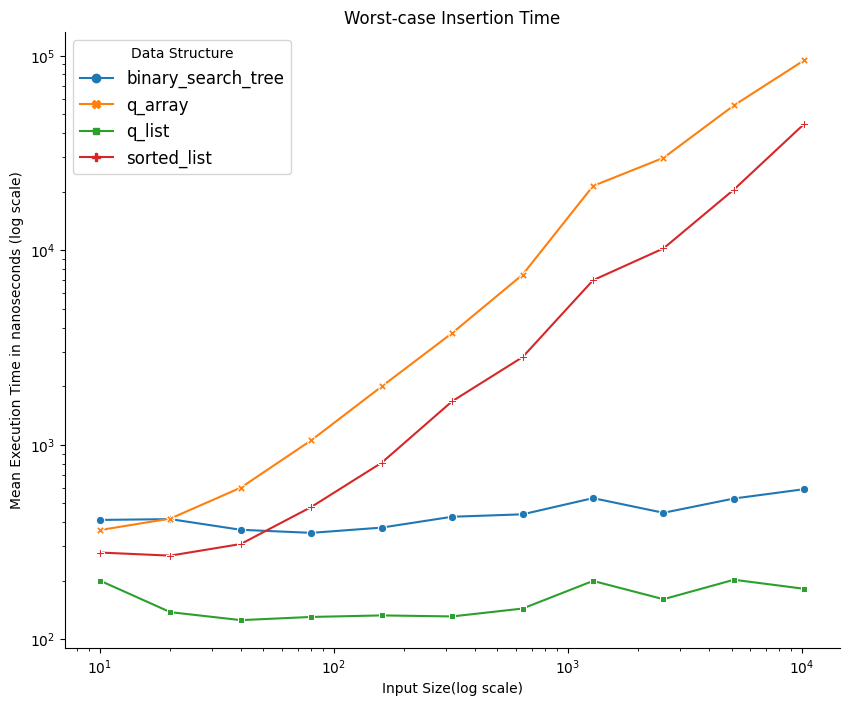

In [126]:
# plot graph of time against input size for each data-structure

plt.figure(figsize=(10,8))
insert_time_plot = sns.lineplot(
                        data=insert_df,
                        markers=True,
                        dashes=False,
                   )
insert_time_plot.set_xscale('log') # change x-axis to log scale
insert_time_plot.set_yscale('log') # change y-axis to log scale
insert_time_plot.set(
    xlabel = "Input Size(log scale)",
    ylabel = "Mean Execution Time in nanoseconds (log scale)",
    title = "Worst-case Insertion Time"
)
sns.despine() # remove top and right border
plt.legend(
    title="Data Structure", 
    loc="upper left",
    fontsize=12
)
# # save the plot
plt.savefig('insert_time.png', bbox_inches='tight')
plt.show()

In [127]:
# plot graph for search operation

# reshape the data
search_df = search_df.pivot_table(
    index='input_size',
    columns='data_structure',
    values='time_nano',
    aggfunc='mean')
search_df

data_structure,binary_search_tree,q_array,q_list,sorted_list
input_size,,,,
10,214.6,217.0,135.0,182.0
20,141.4,305.0,144.0,154.6
40,138.8,536.4,197.0,213.2
80,141.2,993.6,332.0,346.0
160,147.6,1915.0,592.4,608.2
320,154.2,3758.6,1151.8,1157.6
640,250.6,10147.6,2268.6,2294.6
1280,210.4,13963.4,5045.2,5052.0
2560,189.6,21287.0,9081.8,9219.4


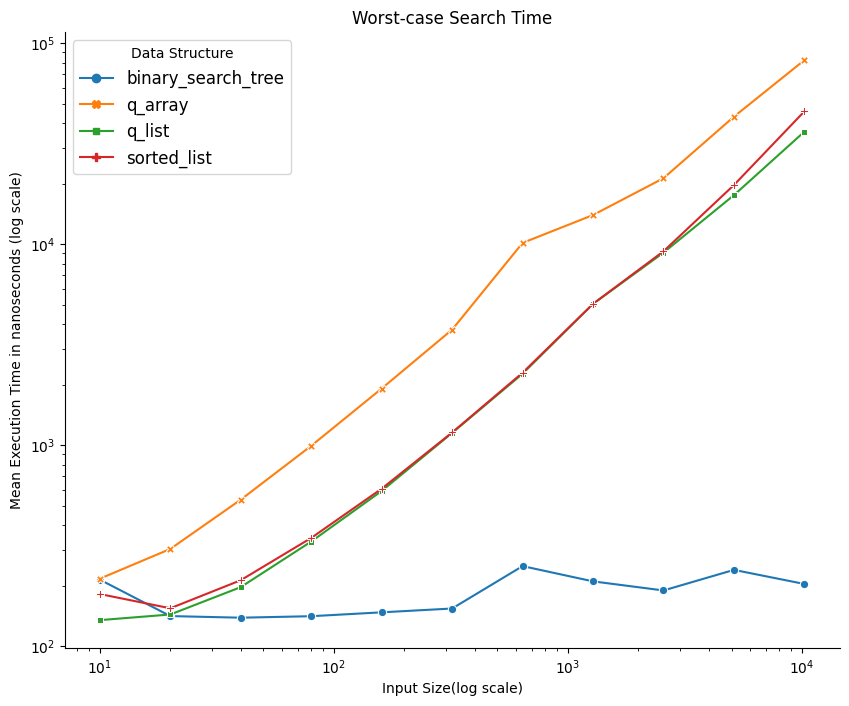

In [128]:
# plot graph of time against input size for each data-structure

plt.figure(figsize=(10,8))
search_time_plot = sns.lineplot(
                        data=search_df,
                        markers=True,
                        dashes=False,
                   )
search_time_plot.set_xscale('log') # change x-axis to log scale
search_time_plot.set_yscale('log') # change y-axis to log scale
search_time_plot.set(
    xlabel = "Input Size(log scale)",
    ylabel = "Mean Execution Time in nanoseconds (log scale)",
    title = "Worst-case Search Time"
)
sns.despine() # remove top and right border
plt.legend(
    title="Data Structure", 
    loc="upper left",
    fontsize=12
)
# # save the plot
plt.savefig('search_time.png', bbox_inches='tight')
plt.show()

In [129]:
# plot graph for delete operation

# reshape the data
delete_df = delete_df.pivot_table(
    index='input_size',
    columns='data_structure',
    values='time_nano',
    aggfunc='mean')
delete_df

data_structure,binary_search_tree,q_array,q_list,sorted_list
input_size,,,,
10,502.8,105.0,321.2,259.6
20,504.2,83.8,118.6,225.2
40,429.6,79.8,100.4,278.2
80,427.8,80.4,98.4,407.0
160,455.2,75.6,108.4,719.6
320,480.8,76.8,143.8,1268.0
640,562.4,97.4,142.6,2566.8
1280,733.0,134.4,187.8,5419.6
2560,526.4,86.8,243.2,9730.8


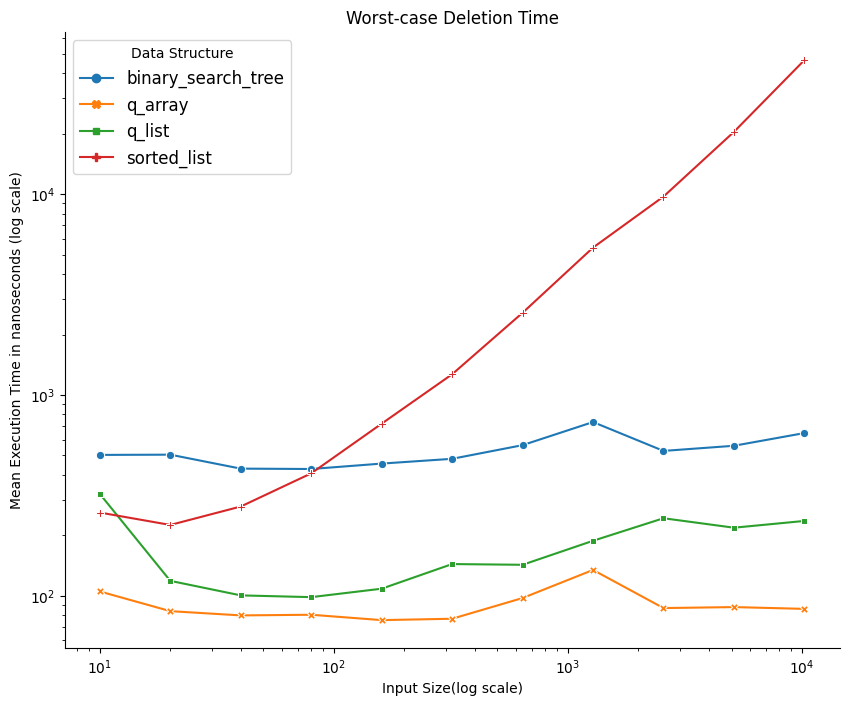

In [130]:
# plot graph of time against input size for each data-structure

plt.figure(figsize=(10,8))
delete_time_plot = sns.lineplot(
                        data=delete_df,
                        markers=True,
                        dashes=False,
                   )
delete_time_plot.set_xscale('log') # change x-axis to log scale
delete_time_plot.set_yscale('log') # change y-axis to log scale
delete_time_plot.set(
    xlabel = "Input Size(log scale)",
    ylabel = "Mean Execution Time in nanoseconds (log scale)",
    title = "Worst-case Deletion Time"
)
sns.despine() # remove top and right border
plt.legend(
    title="Data Structure", 
    loc="upper left",
    fontsize=12
)
# # save the plot
plt.savefig('delete_time.png', bbox_inches='tight')
plt.show()